# Name - Ayushman Chaudhary

# Reg. No. - RA1811027010080

# Experiment No. 4 - Implementation of BFS and DFS for an Application

## Problem 1 - The Flight Plan (BFS)

You are given flights route map of a country consisting of N cities and M undirected flight routes. Each city has an airport and each airport can work as layover. The airport will be in two states, Loading and Running. In loading state, luggage is loaded into the planes. In the running state, planes will leave the airport for the next city. All the airports will switch their states from Loading to Running and vice versa after every T minutes. You can cross a city if its airport state is running. Initially, all the airports are in running state. At an airport, if its state is loading, you have to wait for it to switch its state to running. The time taken to travel through any flight route is C minutes. Find the lexicographically smallest path which will take the minimum amount of time (in minutes) required to move from city X to city Y.

It is guaranteed that the given flight route map will be connected. Graph won't contain multiple edges and self loops. A self loop is an edge that connects a vertex to itself.

Input Format:
The first line contains 4 space separated integers, N, M, T and C. Next M lines contains two space separated integers each, U and V denoting that there is a bidirectional road between city U and city V. Next line contains two space separated integers, X and Y.

Output Format:
In the first line print an integer K, denoting the number of city you need to go through to reach city Y from the city X. In next line, print K space separated integers denoting the path which will take the minimum amount of time (in minutes) required by to move from city X to city Y. There can be multiple paths. Print the lexicographically smallest one.

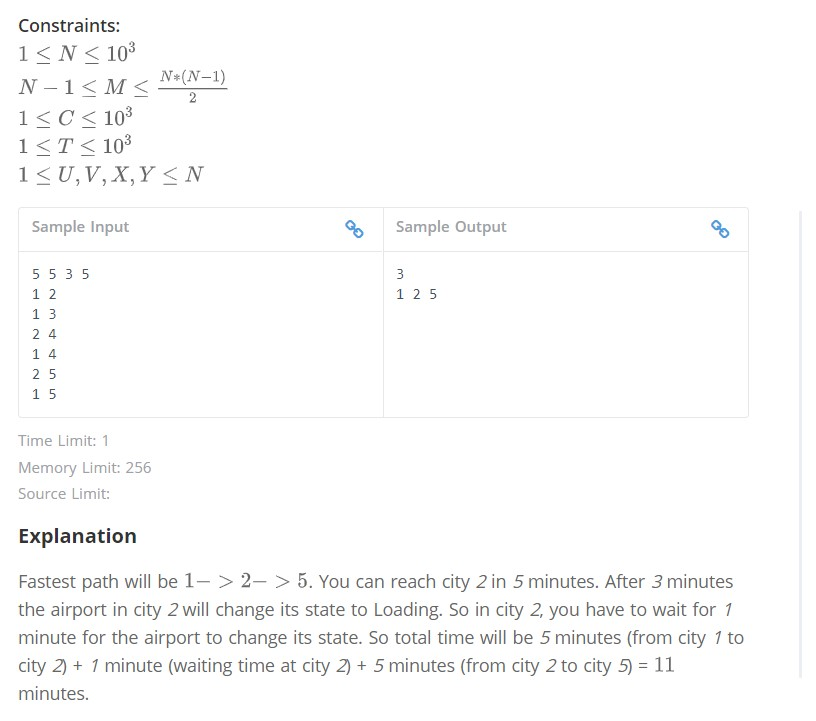

In [1]:
from collections import defaultdict, deque

# Performing BFS Algorithm to find the lexicographically smallest path which will take the minimum amount of time
def bfs(x, y, t, c):
    dq = deque()
    visited = [False] * (n+1) # List for storing the visited nodes
    parent = {}
    dq.append(x)
    visited[x] = True
    parent[x] = -1 # Source node has no root/parent node
    while dq:
        p = dq.popleft() # Removing the visited node that is on the left side (front) of the Queue
        graph[p].sort() # Sorting the neighbouring nodes of the visited node for level-based search
        for q in graph[p]: # 'q' - List of neighbouring nodes of the visited node 'p'
            if visited[q] == False: # If q isn't visited, then add it to the queue and change its status to 'visited'
                visited[q] = True
                dq.append(q)
                parent[q] = p # Storing the parent node of the node 'q' in the 'parent' list
                
            if q == y: # If the destination has been reached
                path = []
                val = y
                while val != -1:
                    path.append(val)
                    val = parent[val]
                print(len(path)) # Printing the number of cities travelled (traversed)
                print(*path[::-1]) # Printing the cities travelled (traversed)
                return

print("Input:") # Note: Kindly remove this statement while running the code in HackerEarth
n, m, t, c = map(int, input().split())
graph = defaultdict(list)
for _ in range(m):
    u, v = map(int, input().split())
    graph[u].append(v)
    graph[v].append(u)
x, y = map(int, input().split())

print("\nOutput:") # Kindly remove this statement while running the code in HackerEarth.
if x == y: # If the source and the destination are the same, 
           # then the output will be 1 for both - no. of cities travelled and the path (required outputs)
    print("1\n1")
else:
    bfs(x, y, t, c)

Input:
5 5 3 5
1 2
1 3
2 4
1 4
2 5
1 5

Output:
3
1 2 5


## Problem 2 - Bishu and his Girlfriend (DFS)

There are N countries {1,2,3,4....N} and N-1 roads(i.e depicting a tree)

Bishu lives in the Country 1 so this can be considered as the root of the tree.

Now there are Q girls who lives in various countries (not equal to 1) .

All of them want to propose Bishu.But Bishu has some condition.

He will accept the proposal of the girl who lives at minimum distance from his country.

Now the distance between two countries is the number of roads between them.

If two or more girls are at the same minimum distance then he will accept the proposal of the girl who lives in a country with minimum id.

No two girls are at same country.

Input: First line consists of N,i.e number of countries Next N-1 lines follow the type u v which denotes there is a road between u and v. Next line consists of Q Next Q lines consists of x where the girls live.

Output: Print the id of the country of the girl who will be accepted.

Help Him!!!!!

contraints: 2<=N<=1000 1<=u,v<=N 1<=Q<=(N-1)

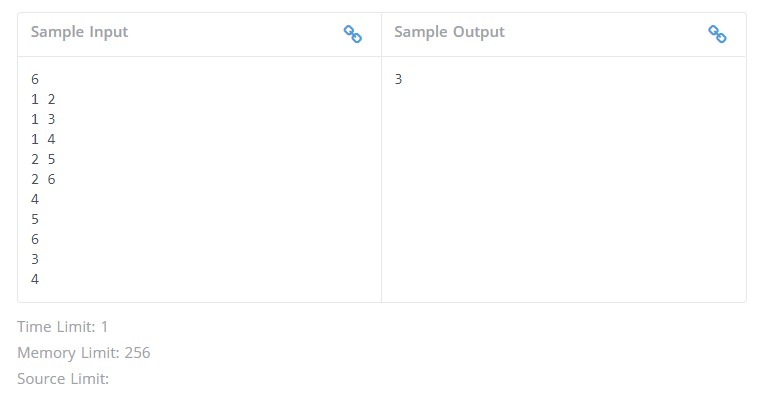

In [2]:
from collections import defaultdict

print("Input:") # Note: Kindly remove this statement while running the code in HackerEarth
n = int(input())
graph = defaultdict(list)
# Graph's bidirectional edges input
for i in range(n-1):
    a, b = map(int,input().split())
    graph[a].append(b)
    graph[b].append(a)
 
q = int(input())
cid = [] # Country ID list for the girls 
for i in range(q):
    cid.append(int(input()))
 
visited = [0] * (n+1) # Initialising the visited node list by default to 0
x = {} # Dictionary for storing the distance values for each node

# Performing DFS Algorithm to find the Minimum Distance
def dfs(v, d): 
    visited[v] = 1
    x[v] = d
    for i in graph[v]:
        if visited[i] == 0:
            dfs(i, d+1)
 
dfs(1,0) # Starting DFS with the source node
ans = {} # Dictionary for storing the distance of the visited nodes
for i in cid:
    for j in x.keys():
        if i == j:
            ans[j] = x[j]
 
mini = 1001 # Random min value to find out the minimum country ID
res = 0
# Finding out the minimum country ID among the IDs having the same distance from the source node
for i in ans:
    if ans[i] < mini:
        mini = ans[i]
        res = i

print("\nOutput:") # Kindly remove this statement while running the code in HackerEarth
print(res)

Input:
6
1 2
1 3
1 4
2 5
2 6
4
5
6
3
4

Output:
3
